In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import sqlite3
import csv

In [ ]:
df=pd.read_csv('/content/Amazon Sales data.csv')

In [ ]:
#print(df.info)
#converting the csv file to .db file and storing the data in sales_data.db
conn = sqlite3.connect('sales_db.db')
df.to_sql('sales_data',conn,if_exists='replace',index=False)



100

In [ ]:
df.shape

(100, 14)

In [ ]:
df.size

1400

In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
df.ndim

2

In [ ]:
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [ ]:
count_unique=df['Item Type'].value_counts()
print(count_unique)

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64


In [ ]:
df.duplicated()
df.drop_duplicates()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])#will convert date column to datetime type
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
#from this part we will find data insights

Text(0, 0.5, 'Sales')

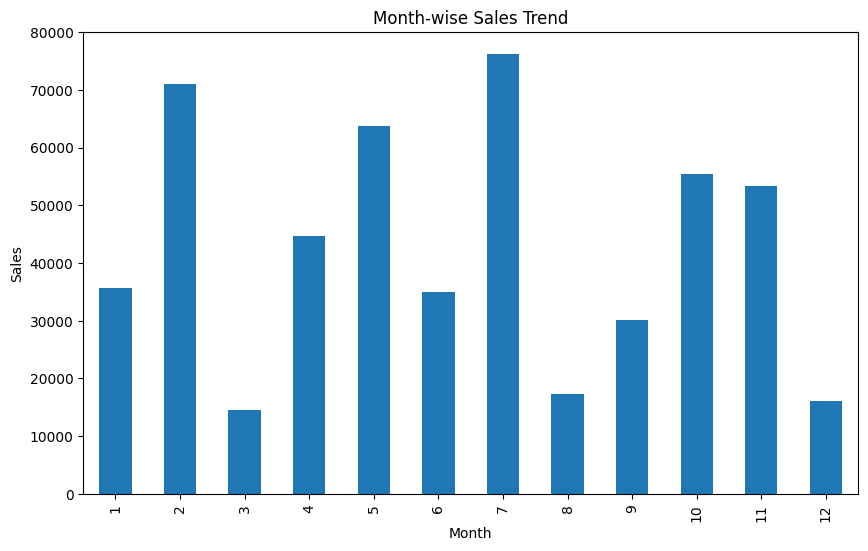

In [ ]:
# Month-wise Sales Trend based on units sold
df_monthly = df.groupby(df['Order Date'].dt.month)['Units Sold'].sum()
plt.figure(figsize=(10,6))
#sns.lineplot(data=df_monthly)
df_monthly.plot(kind='bar')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')


Text(0, 0.5, 'Sales')

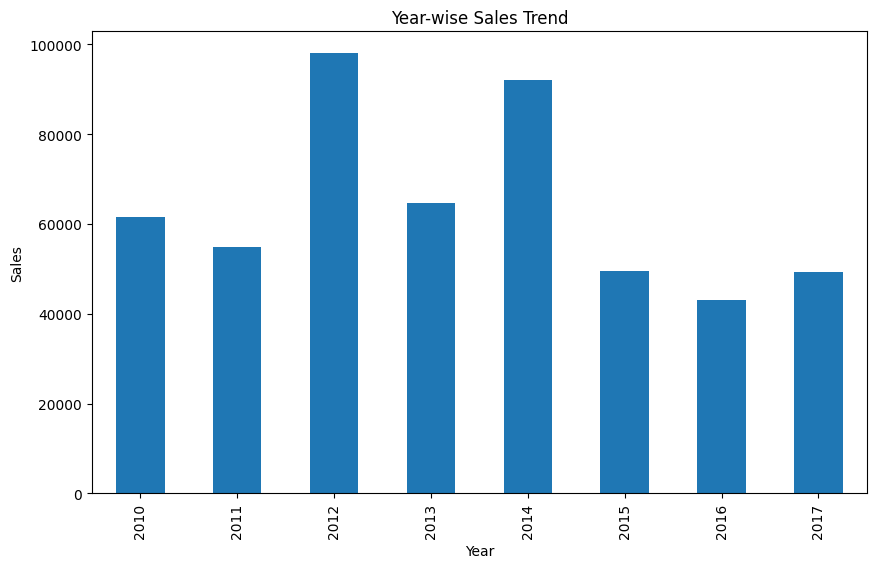

In [ ]:
# Year-wise Sales Trend based on units sold
df_yearly = df.groupby(df['Order Date'].dt.year)['Units Sold'].sum()
plt.figure(figsize=(10,6))
#sns.lineplot(data=df_yearly)
df_yearly.plot(kind='bar')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')

Text(0, 0.5, 'Year')

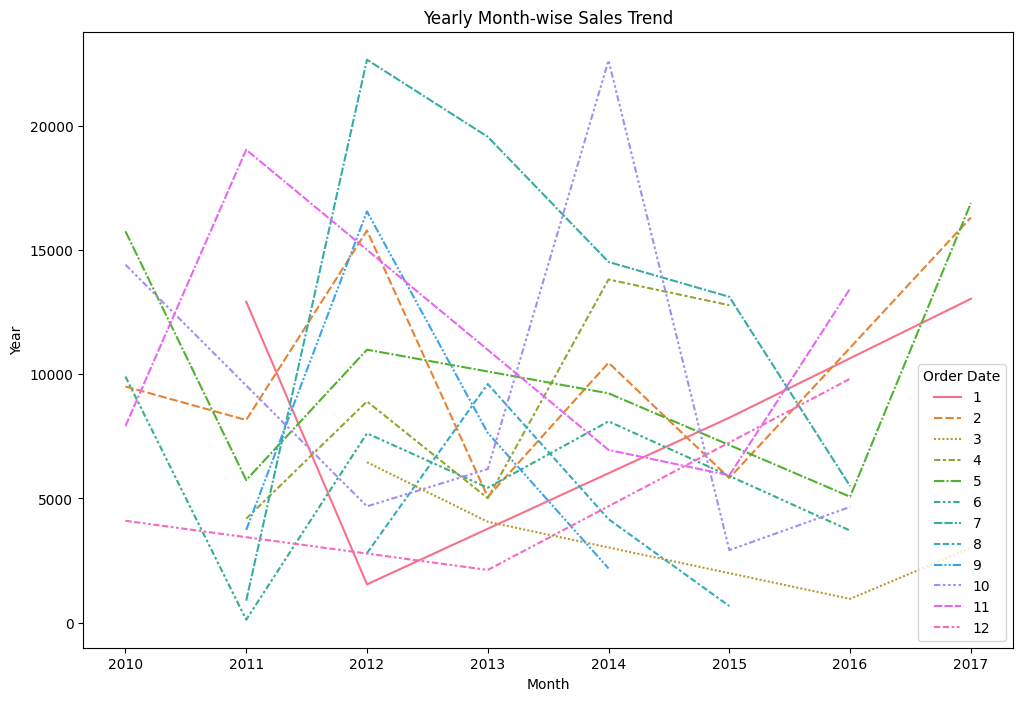

In [ ]:
# Yearly Month-wise Sales Trend based on units sold
df_yearly_monthly = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Units Sold'].sum()
plt.figure(figsize=(12,8))
#sns.heatmap(df_yearly_monthly.unstack(), annot=True, cmap='Blues')
sns.lineplot(data=df_yearly_monthly.unstack())
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')


<Figure size 1000x600 with 0 Axes>

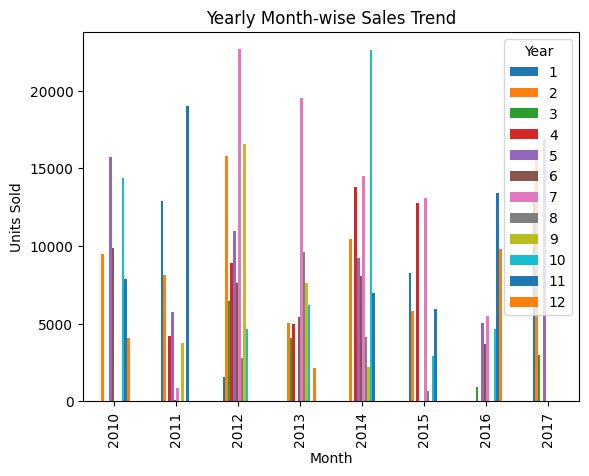

In [ ]:
#bar plot version of above line plot
df_yearly_monthly = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Units Sold'].sum()

plt.figure(figsize=(10,6))
df_yearly_monthly.unstack().plot(kind='bar')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.legend(title='Year')
plt.show()

In [ ]:
#creating a dataframe with numerical data only for heatmap
#num_data = df[[  'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
 #      'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]
#num_data.info()

In [ ]:
#plt.figure(figsize=(16,9))
#heatmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ff0000", "#ffff00", "#00ff00", "#00ffff", "#0000ff"])
#sns.heatmap(num_data.corr(method='pearson'),annot=True,vmin=1,vmax=1,cmap=heatmap)

Text(0, 0.5, 'Revenue')

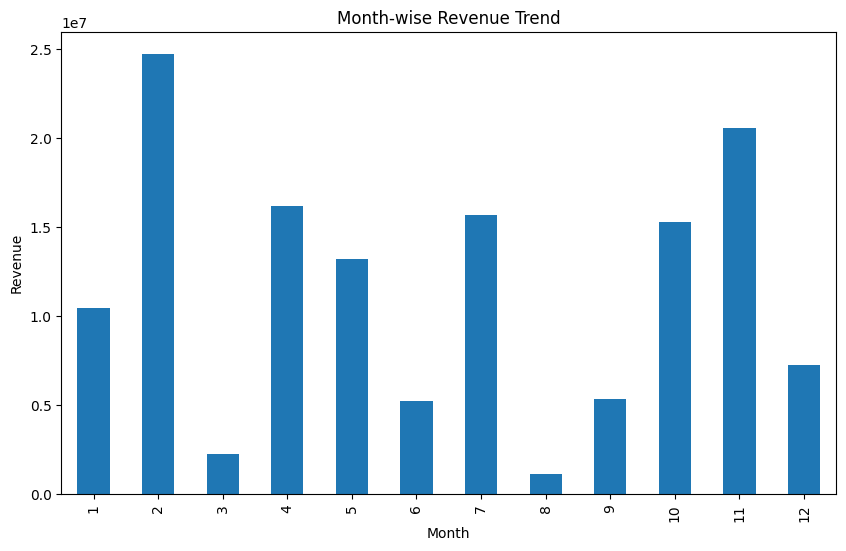

In [ ]:
# month-wise revenue
df_yearly = df.groupby(df['Order Date'].dt.month)['Total Revenue'].sum()
plt.figure(figsize=(10,6))
#sns.lineplot(data=df_yearly)
df_yearly.plot(kind='bar')
plt.title('Month-wise Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')

Text(0, 0.5, 'Revenue')

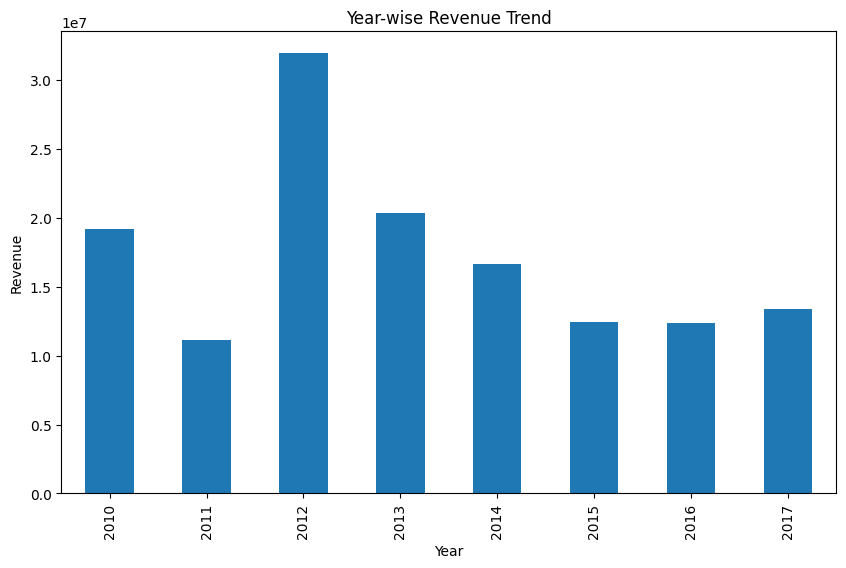

In [ ]:
# Year-wise Revenue
df_yearly = df.groupby(df['Order Date'].dt.year)['Total Revenue'].sum()
plt.figure(figsize=(10,6))
#sns.lineplot(data=df_yearly)
df_yearly.plot(kind='bar')
plt.title('Year-wise Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Revenue')

<Figure size 1000x600 with 0 Axes>

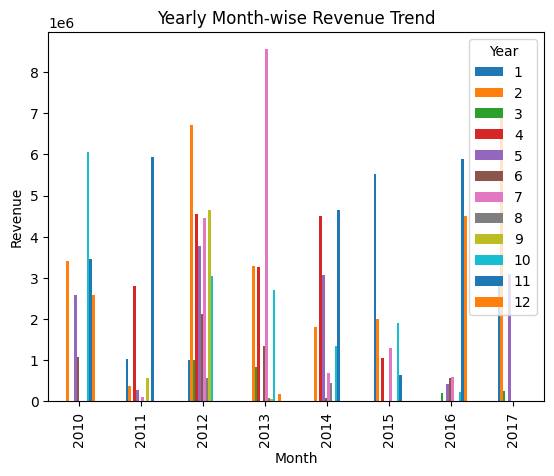

In [ ]:
# Yearly-Month-wise Revenue
df_yearly_monthly = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Total Revenue'].sum()

plt.figure(figsize=(10,6))
df_yearly_monthly.unstack().plot(kind='bar')
plt.title('Yearly Month-wise Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Year')
plt.show()




Text(0, 0.5, 'Profit')

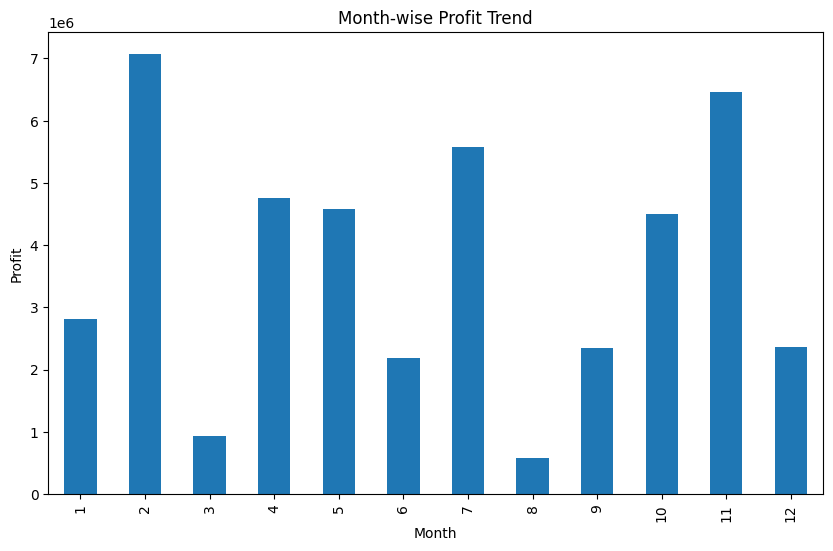

In [ ]:
# month-wise profit
df_yearly = df.groupby(df['Order Date'].dt.month)['Total Profit'].sum()
plt.figure(figsize=(10,6))
#sns.lineplot(data=df_yearly)
df_yearly.plot(kind='bar')
plt.title('Month-wise Profit Trend')
plt.xlabel('Month')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

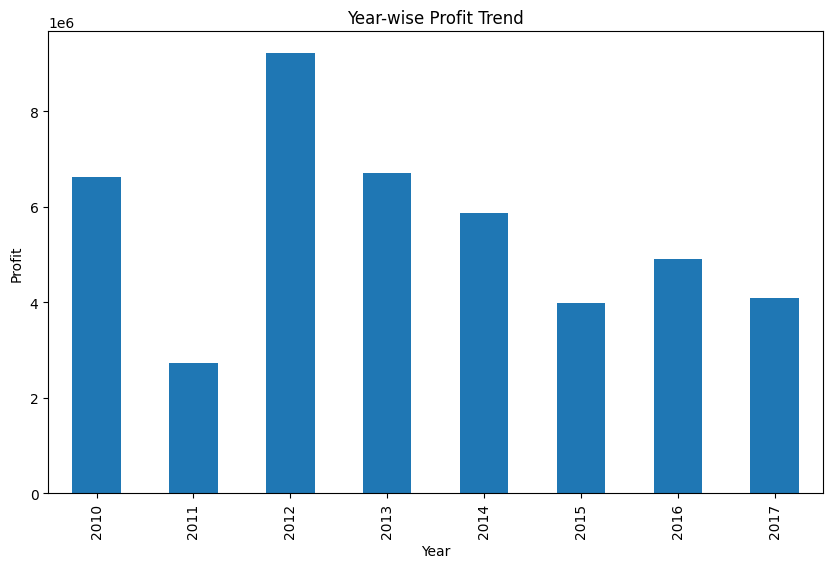

In [ ]:
# Year-wise Profit
df_yearly = df.groupby(df['Order Date'].dt.year)['Total Profit'].sum()
plt.figure(figsize=(10,6))
#sns.lineplot(data=df_yearly)
df_yearly.plot(kind='bar')
plt.title('Year-wise Profit Trend')
plt.xlabel('Year')
plt.ylabel('Profit')

<Figure size 1000x600 with 0 Axes>

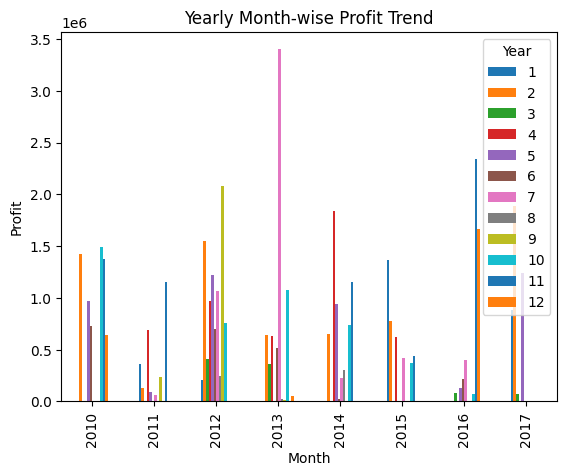

In [ ]:
# Yearly-Month-wise Profit
df_yearly_monthly = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Total Profit'].sum()

plt.figure(figsize=(10,6))
df_yearly_monthly.unstack().plot(kind='bar')
plt.title('Yearly Month-wise Profit Trend')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend(title='Year')
plt.show()

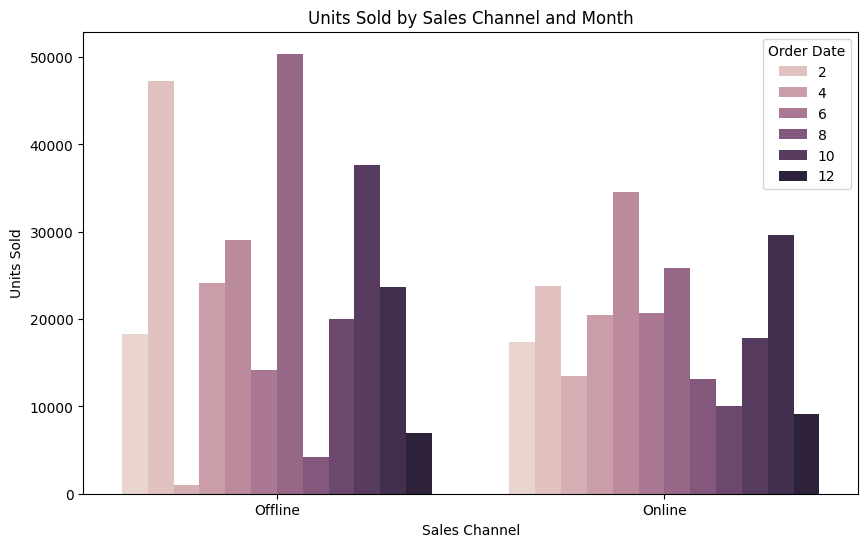

In [ ]:
# Group by sales channel and year, and sum units sold # find how many units were sold offline and online and in which month
df_sales_channel_year = df.groupby([df['Order Date'].dt.month, 'Sales Channel'])['Units Sold'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x='Sales Channel', y='Units Sold', hue='Order Date', data=df_sales_channel_year)
plt.title('Units Sold by Sales Channel and Month')
plt.show()


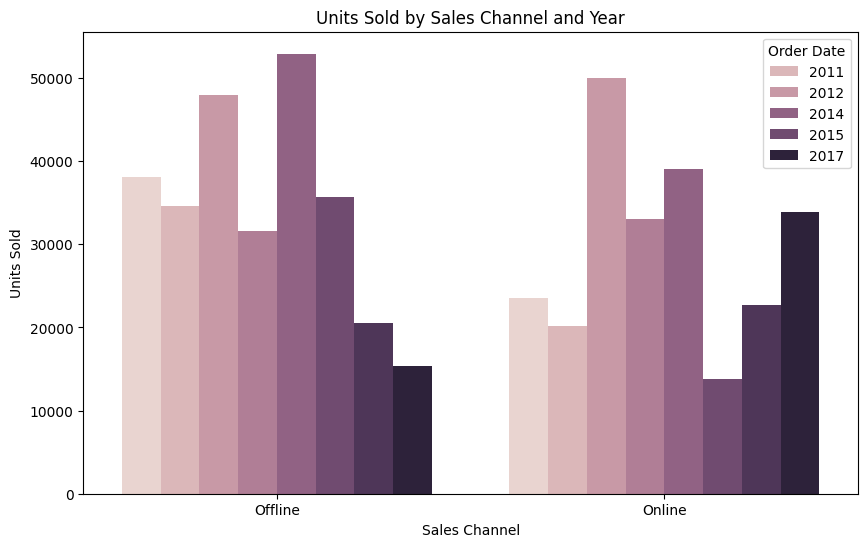

In [ ]:
# Group by sales channel and year, and sum units sold # find how many units were sold offline and online and in which year
df_sales_channel_year = df.groupby([df['Order Date'].dt.year, 'Sales Channel'])['Units Sold'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x='Sales Channel', y='Units Sold', hue='Order Date', data=df_sales_channel_year)
plt.title('Units Sold by Sales Channel and Year')
plt.show()


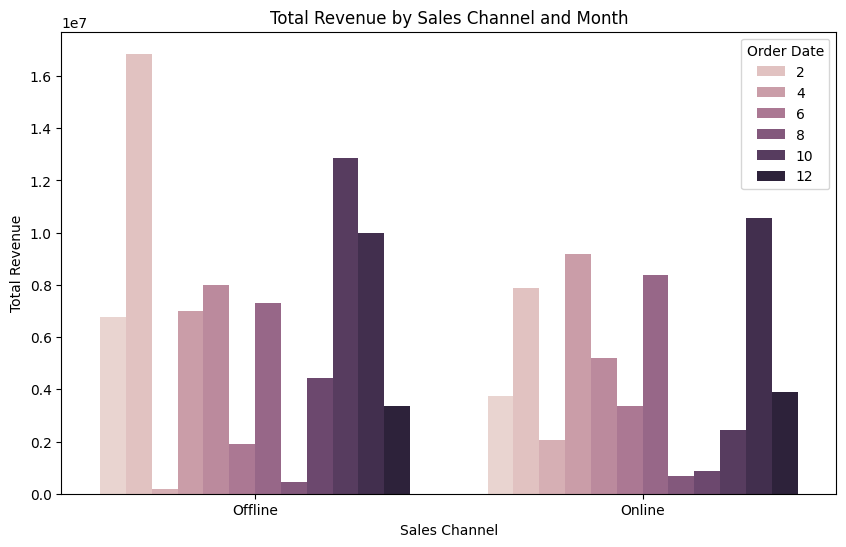

In [ ]:
# Group by sales channel and year, and sum units sold # find how much revenue was generated through offline and online and in which month
df_revenue_year_channel = df.groupby([df['Order Date'].dt.month, 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x='Sales Channel', y='Total Revenue', hue='Order Date', data=df_revenue_year_channel)
plt.title('Total Revenue by Sales Channel and Month')
plt.show()


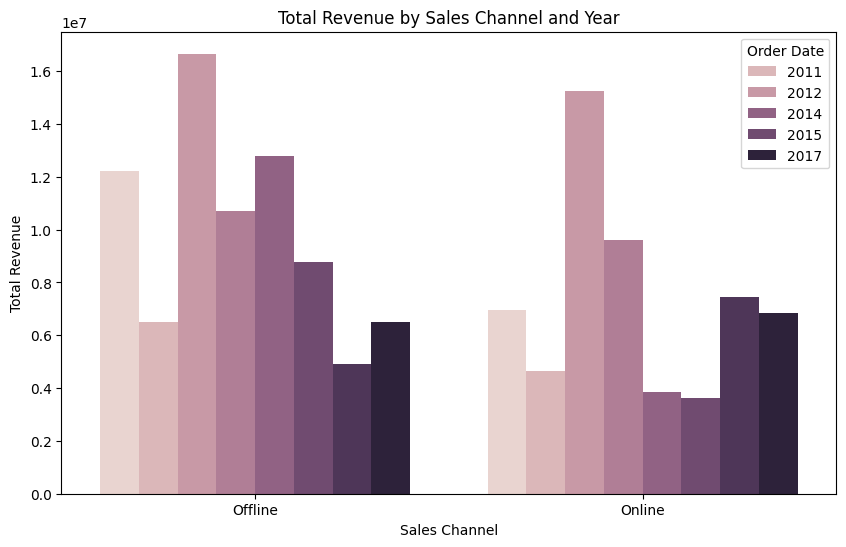

In [ ]:
# Group by sales channel and year, and sum units sold # find how much revenue was generated through offline and online and in which year
df_revenue_year_channel = df.groupby([df['Order Date'].dt.year, 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x='Sales Channel', y='Total Revenue', hue='Order Date', data=df_revenue_year_channel)
plt.title('Total Revenue by Sales Channel and Year')
plt.show()


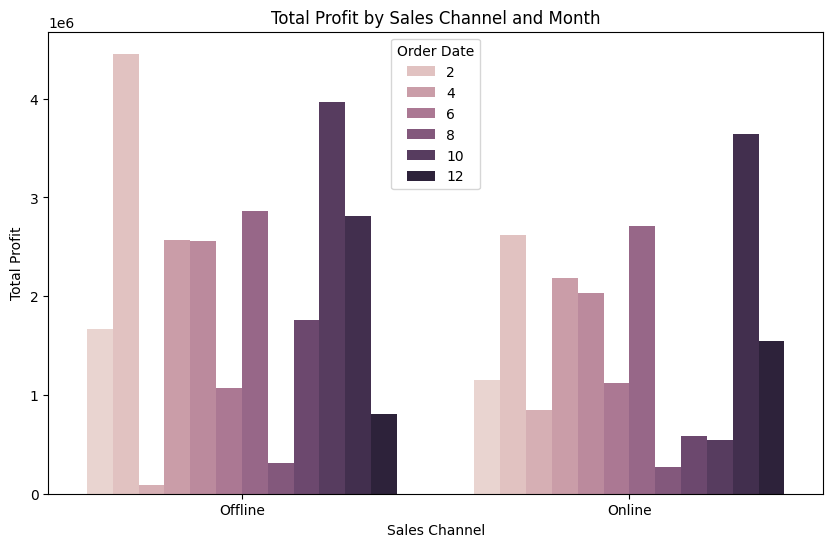

In [ ]:
# Group by sales channel and year, and sum units sold # find how much profit was generated through offline and online and in which month
df_profit_year_channel = df.groupby([df['Order Date'].dt.month, 'Sales Channel'])['Total Profit'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x='Sales Channel', y='Total Profit', hue='Order Date', data=df_profit_year_channel)
plt.title('Total Profit by Sales Channel and Month')
plt.show()


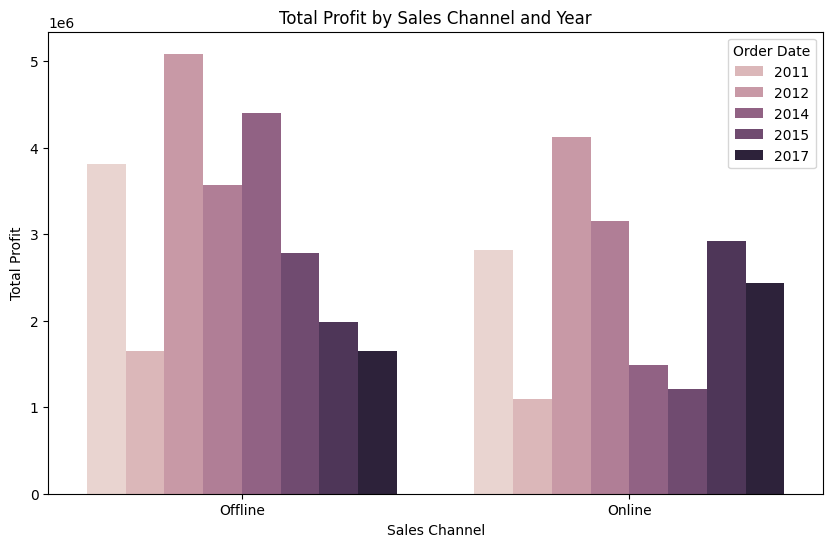

In [ ]:
# Group by sales channel and year, and sum units sold # find how much profit was generated through offline and online and in which year
df_profit_year_channel = df.groupby([df['Order Date'].dt.year, 'Sales Channel'])['Total Profit'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x='Sales Channel', y='Total Profit', hue='Order Date', data=df_profit_year_channel)
plt.title('Total Profit by Sales Channel and Year')
plt.show()


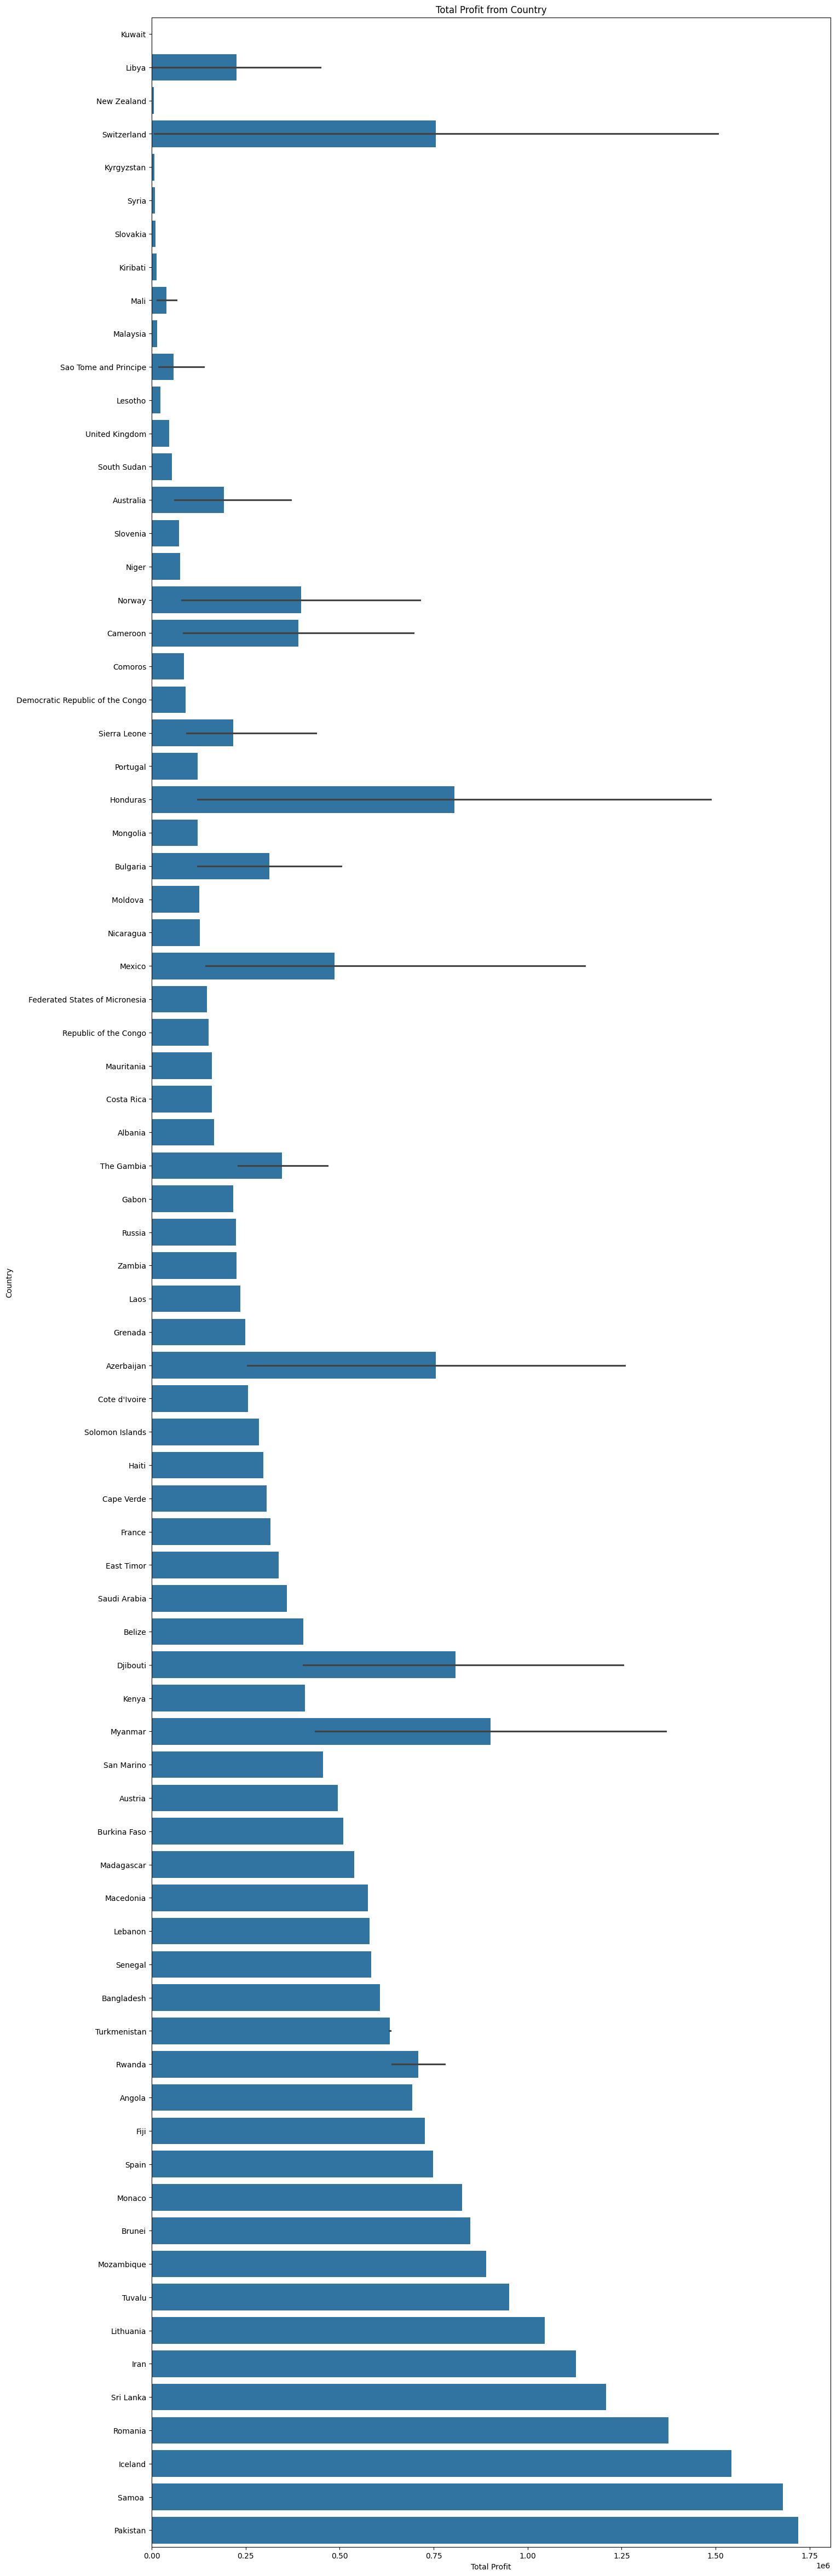

In [ ]:
# profit country-wise
df_profit_country = df.groupby([df['Total Profit']])['Country'].sum().reset_index()

# Plot the results
plt.figure(figsize=(16,60))
sns.barplot(x='Total Profit', y='Country', data=df_profit_country)
plt.title('Total Profit from Country')
plt.show()


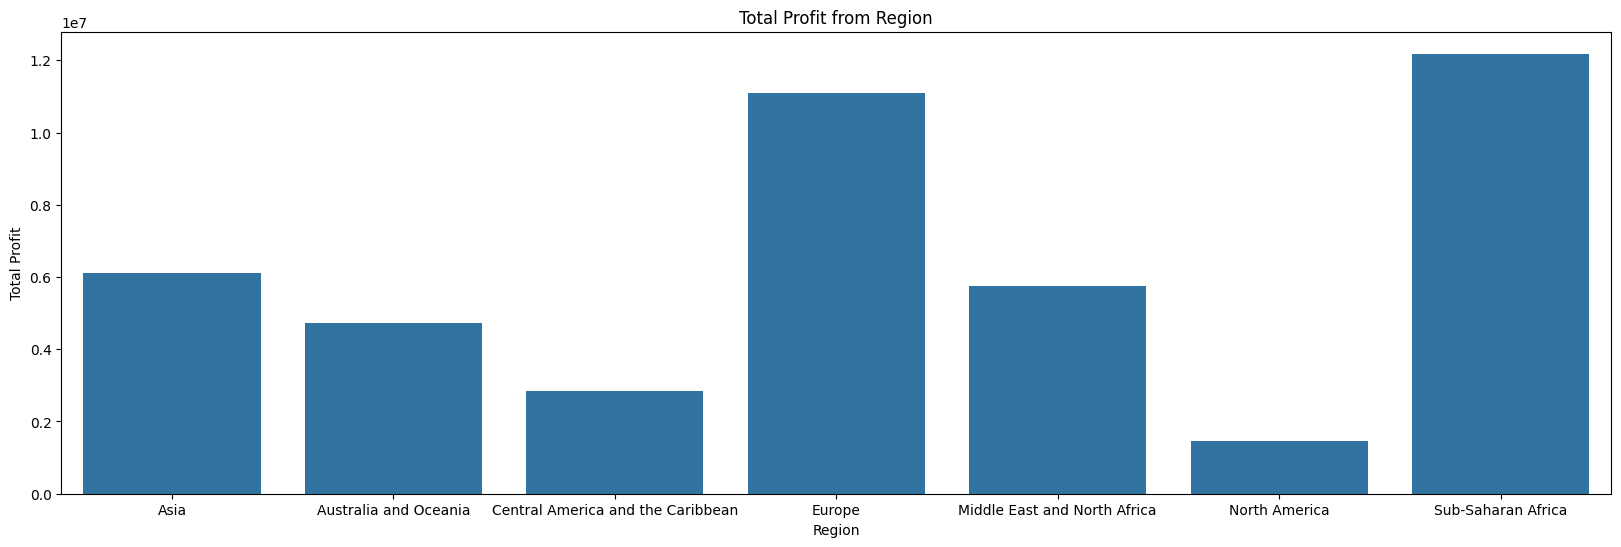

In [ ]:
# profit Region-wise
df_profit_region = df.groupby([df['Region']])['Total Profit'].sum().reset_index()

# Plot the results
plt.figure(figsize=(20,6))
sns.barplot(x='Region', y='Total Profit', data=df_profit_region)
plt.title('Total Profit from Region')
plt.show()

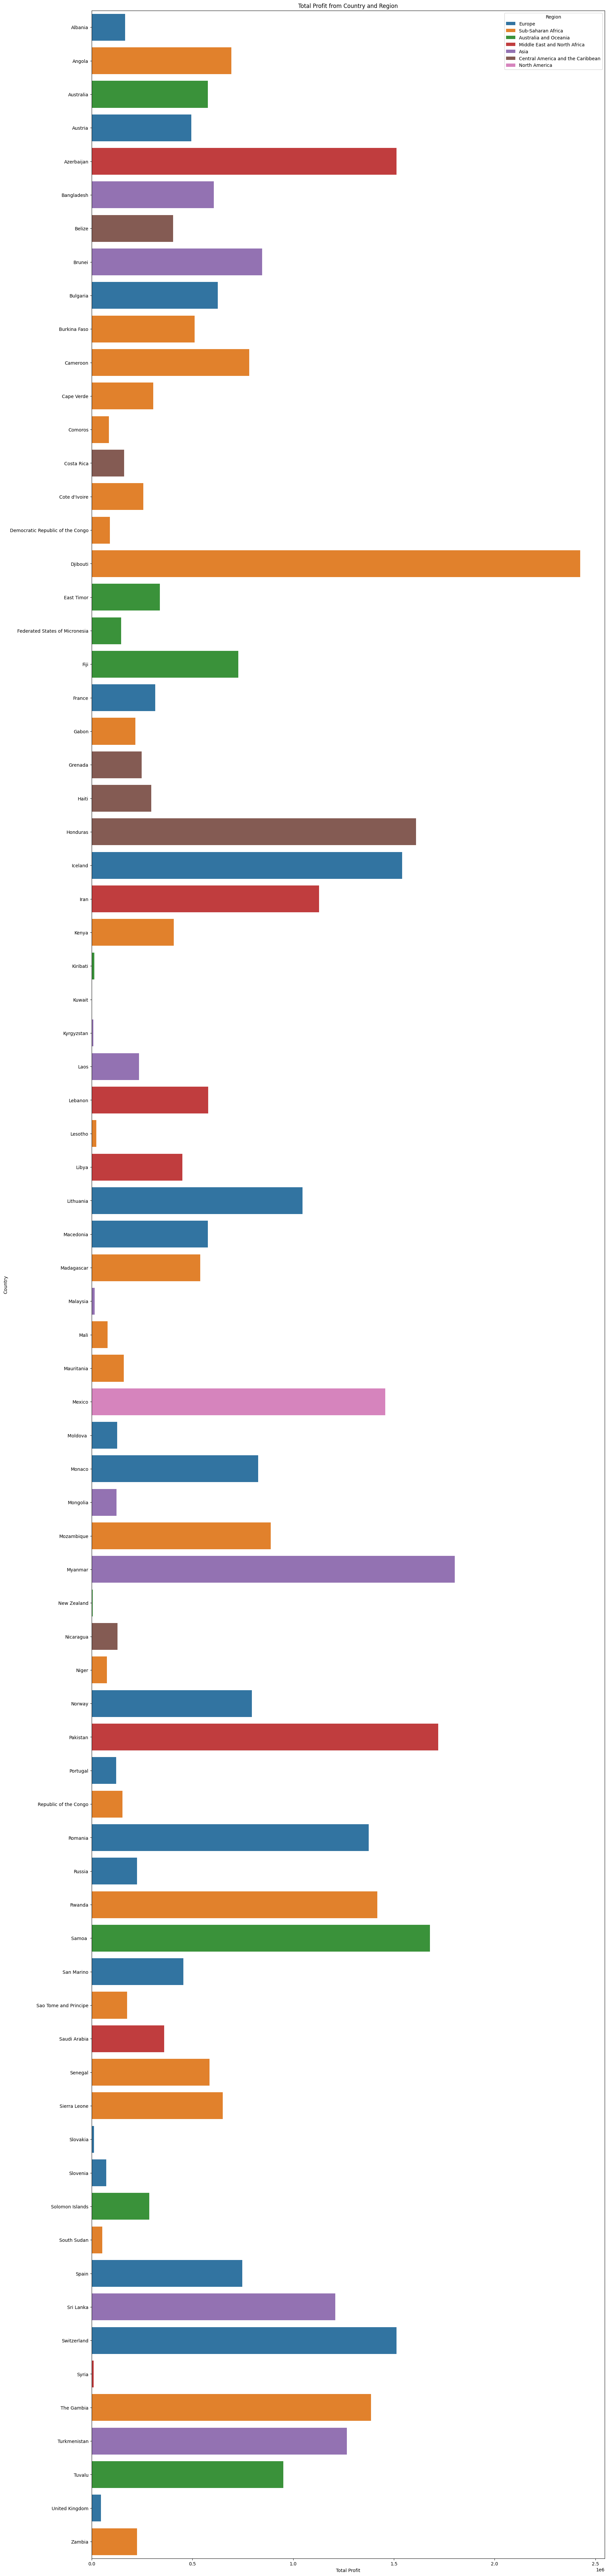

In [ ]:
# Profit fron a region and country
df_profit = df.groupby([df['Country'], 'Region'])['Total Profit'].sum().reset_index()

# Plot the results
plt.figure(figsize=(20,100))
sns.barplot(x='Total Profit', y='Country', hue='Region', data=df_profit)
plt.title('Total Profit from Country and Region')
plt.show()


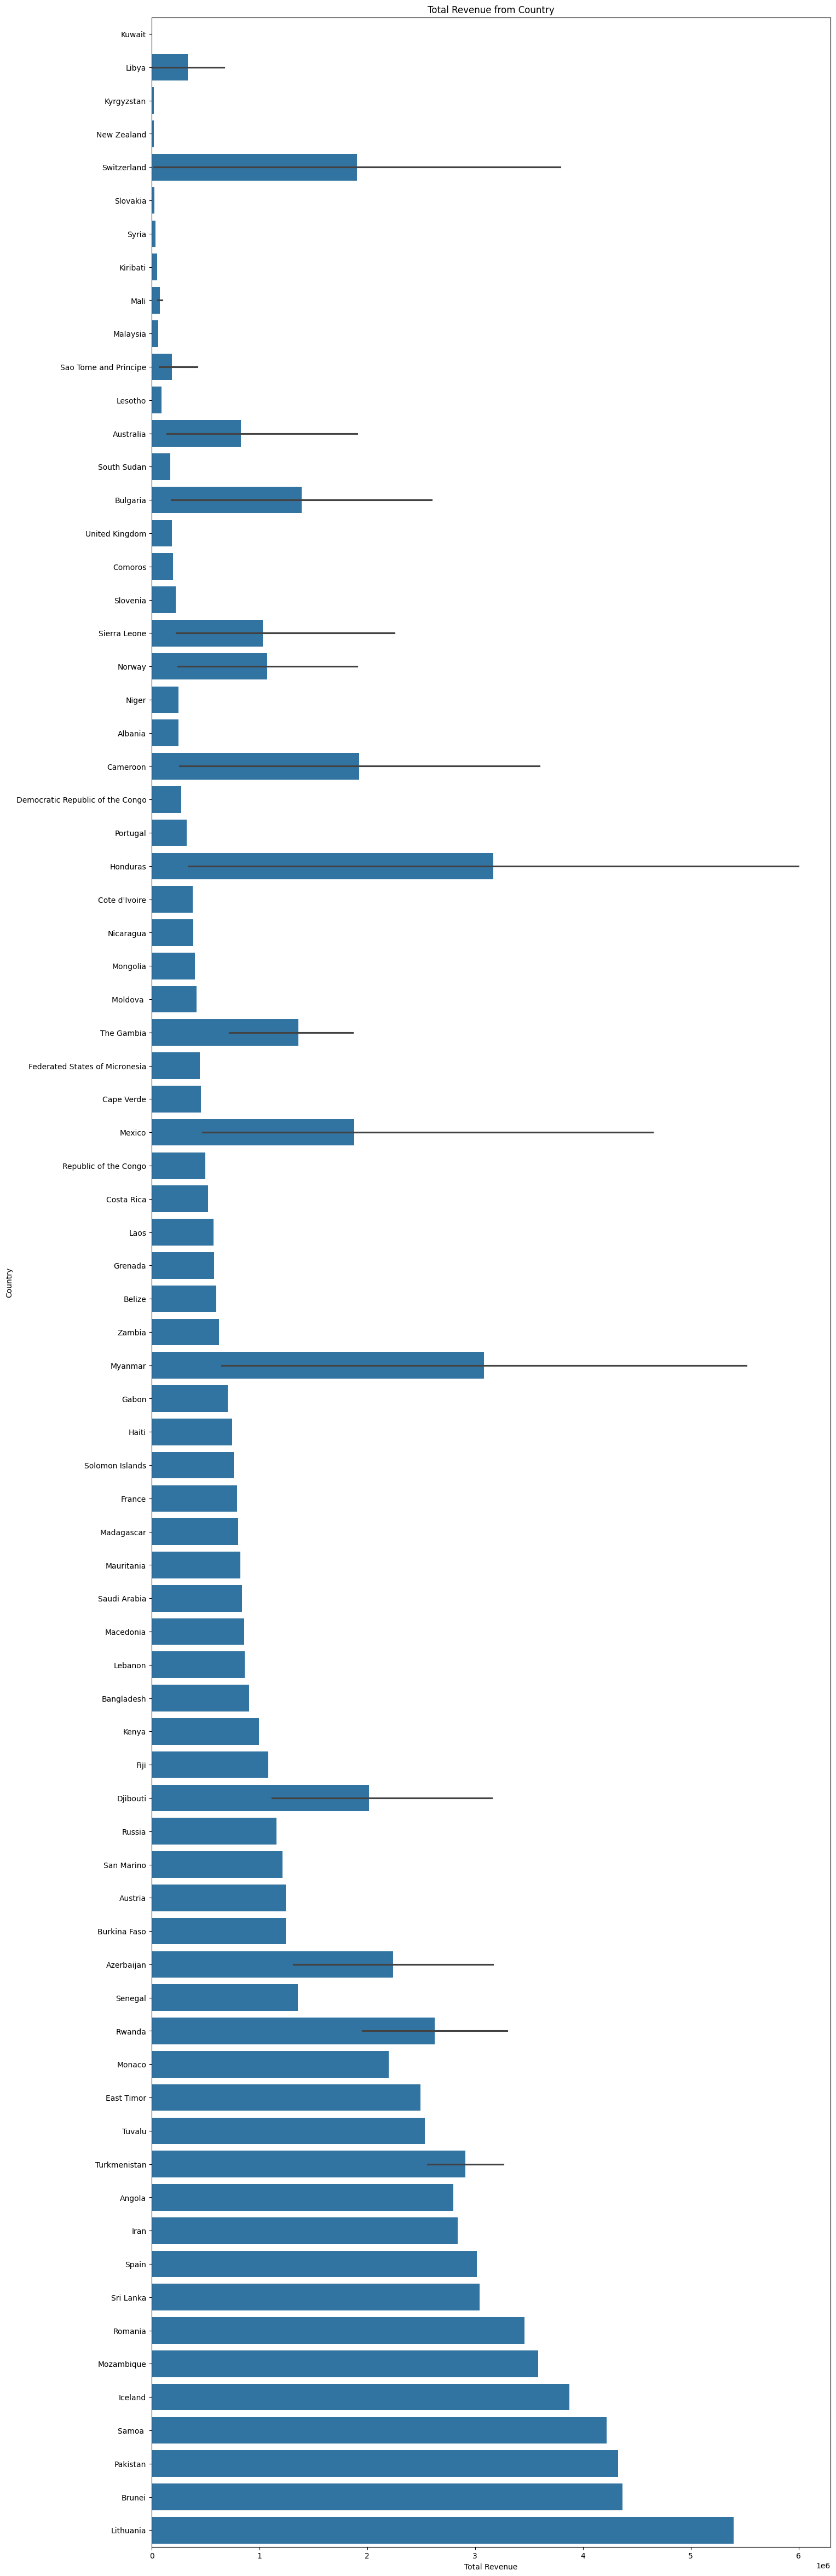

In [ ]:
# Revenue country-wise
df_revenue_country = df.groupby([df['Total Revenue']])['Country'].sum().reset_index()

# Plot the results
plt.figure(figsize=(16,60))
sns.barplot(x='Total Revenue', y='Country', data=df_revenue_country)
plt.title('Total Revenue from Country')
plt.show()


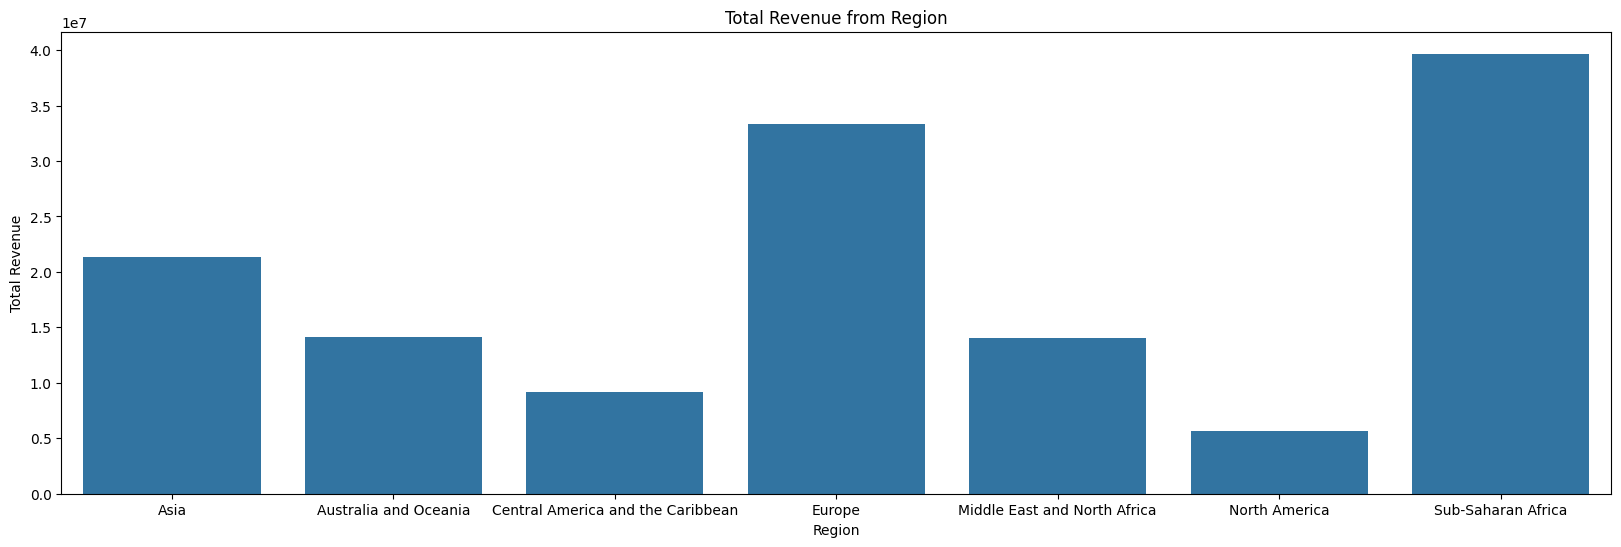

In [ ]:
# Revenue region-wise

df_revenue_region = df.groupby([df['Region']])['Total Revenue'].sum().reset_index()

# Plot the results
plt.figure(figsize=(20,6))
sns.barplot(x='Region', y='Total Revenue', data=df_revenue_region)
plt.title('Total Revenue from Region')
plt.show()

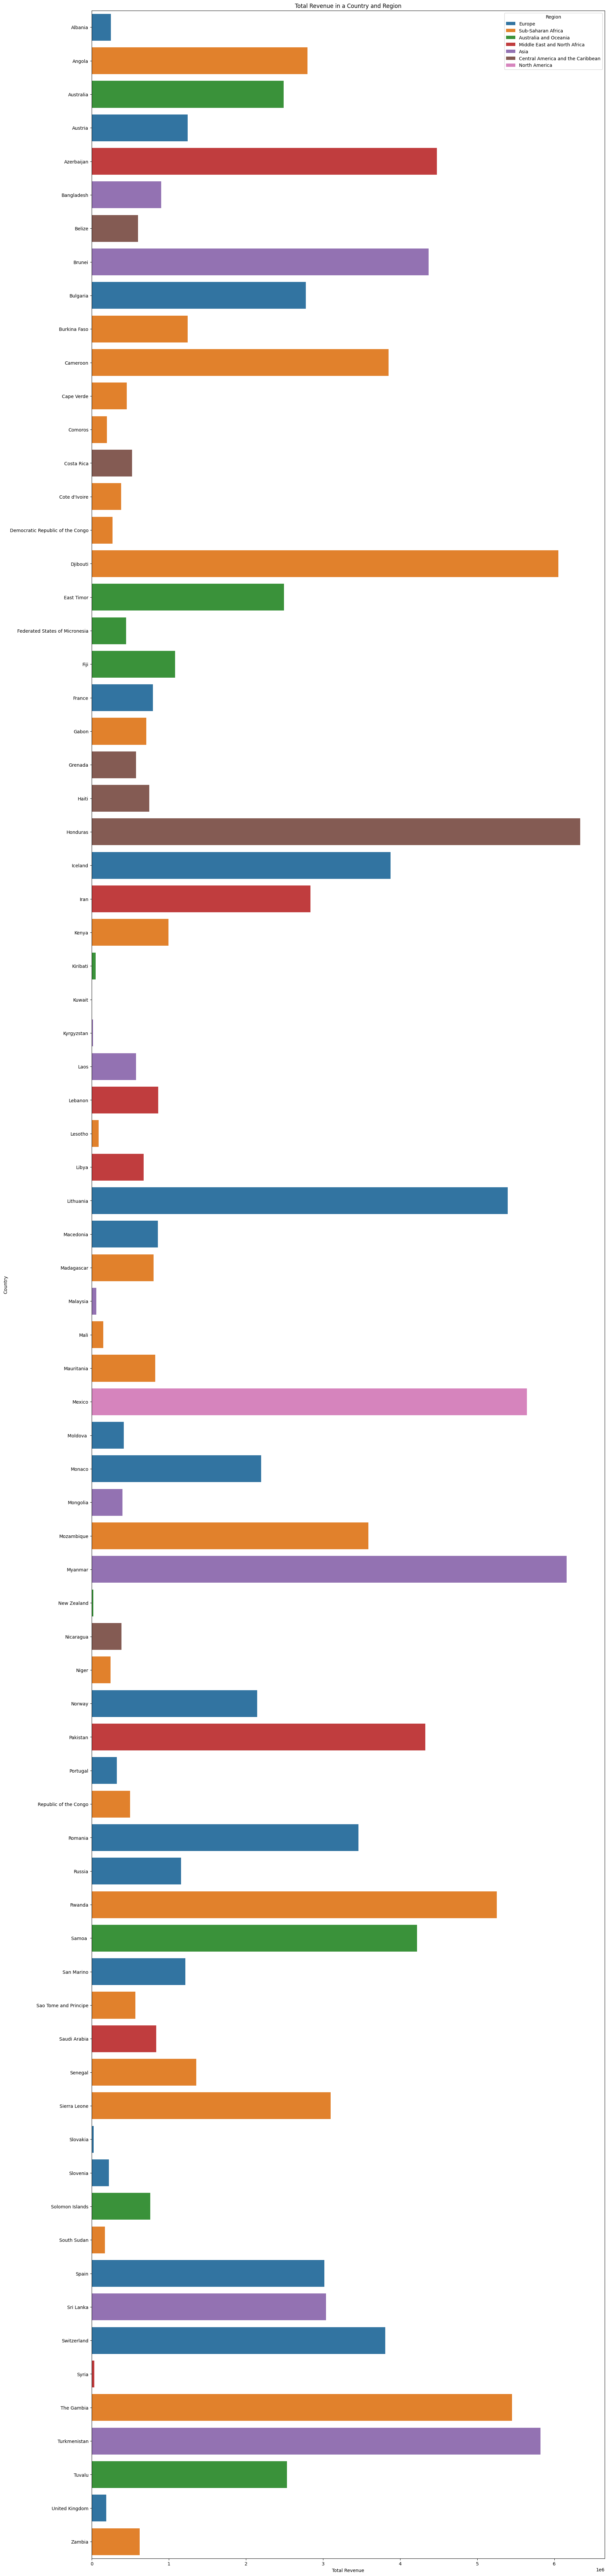

In [ ]:
# Revenue fron a region and country
df_profit_revenue = df.groupby([df['Country'], 'Region'])['Total Revenue'].sum().reset_index()

# Plot the results
plt.figure(figsize=(20,100))
sns.barplot(x='Total Revenue', y='Country', hue='Region', data=df_profit_revenue)
plt.title('Total Revenue in a Country and Region')
plt.show()
